In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn 

#### Removing Data Binning

Converting continuous data to categorical data (binning) may have removed a lot of important information from an already small dataset. I will proceed with keeping the dataset as it is (except with the target) and report any differences regarding model assessment. 

In [2]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [3]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels

In [4]:
# week03_nobin.csv
#df.to_csv("../../data/processed/week03_nobin.csv", index = False)

#### New Feature: Absolute Difference Between Alph1 and Alph2

We think adding a new feature may potentially help in improving the model assessment by providing more information.

In [5]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [6]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(df['alph1'])):
    diff.append(abs(df['alph1'][i] - df['alph2'][i]))
    
df['diff'] = diff

<AxesSubplot:>

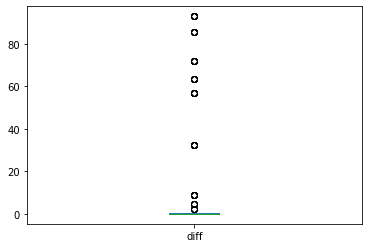

In [7]:
df['diff'].plot.box()

<AxesSubplot:>

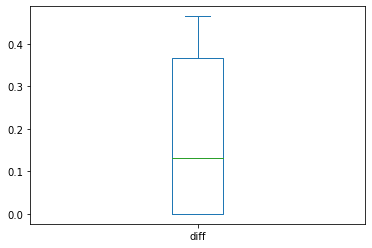

In [8]:
df['diff'].plot.box(showfliers=False)

In [9]:
print(df['diff'].mean())
print(df['diff'].median())
print(df['diff'].min())
print(df['diff'].max())

8.363363996971147
0.13114754098399972
0.0
92.894594594594


In [10]:
df['diff'].quantile([0.25,0.5,0.75])

0.25    0.000000
0.50    0.131148
0.75    0.366274
Name: diff, dtype: float64

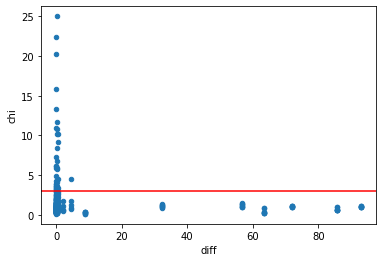

In [11]:
df.plot.scatter(x='diff', y='chi')
plt.axhline(y=3, color='r', linestyle='-')

In [12]:
df.loc[df['chi'] >= 3]['diff'].max()
#large_chi_df['diff'].max()

4.670833333334

All large chi values appear when the difference is very small. The largest difference is 4.67.

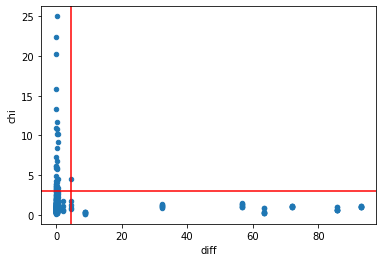

In [13]:
df.plot.scatter(x='diff', y='chi')
plt.axhline(y=3, color='r', linestyle='-')
plt.axvline(x=4.671, color='r', linestyle='-')

In [14]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels

In [15]:
# week03_nobin_diff.csv
#df.to_csv("../../data/processed/week03_nobin_diff.csv", index = False)

#### Overcoming Overfitting

In [16]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [17]:
small_chi = np.genfromtxt("../../data/Small_chi.dat")
small_chi = np.delete(small_chi, 0, 0)
small_chi_df = pd.DataFrame(small_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

<AxesSubplot:xlabel='ustat', ylabel='chi'>

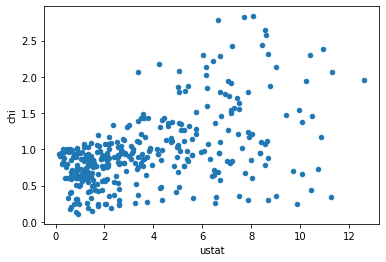

In [18]:
small_chi_df.plot.scatter(x='ustat', y='chi')

In [19]:
# rightmost small_chi value
small_chi_df['ustat'].max()

12.597931067132

In [20]:
large_chi = np.genfromtxt("../../data/Large_chi.dat")
large_chi = np.delete(large_chi, 0, 0)
large_chi_df = pd.DataFrame(large_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

<AxesSubplot:xlabel='ustat', ylabel='chi'>

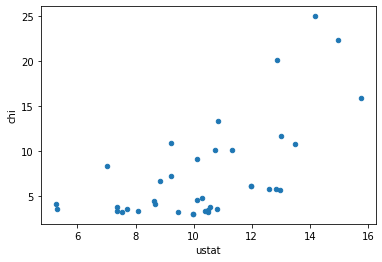

In [21]:
large_chi_df.plot.scatter(x='ustat', y='chi')

In [22]:
# leftmost large_chi value
large_chi_df['ustat'].min()

5.265923675845

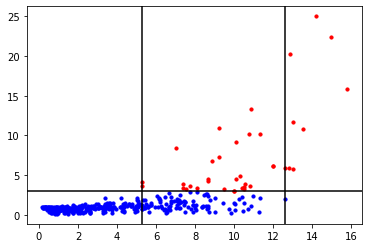

In [23]:
plt.scatter(small_chi_df['ustat'], small_chi_df['chi'], s = 10, c = 'blue')
plt.scatter(large_chi_df['ustat'], large_chi_df['chi'], s = 10, c = 'red')

plt.axhline(y=3, color='black', linestyle='-')
plt.axvline(x=5.26, color='black', linestyle='-')
plt.axvline(x=12.60, color='black', linestyle='-')

#### Bowman Suggestions:

1. Suppose you use u* and alphdif as inputs again.  Then train on all data in the large chi cluster and a random split (maybe 50:50) of the small chi cluster.  Then test on the data left out of the small chi cluster.  What we want to see if that test data gets assigned to the small cluster with no errors.

2. Cut from the small and large chi datasets just the data with u* between 5 and 12.  Then we can eyeball the these datasets and see if we spot anything that might distinguish the two

Suggestion #1: Train on all data in the large chi cluster and a random split (maybe 50:50) of the small chi cluster. Then test on the data left out of the small chi cluster. 

In [24]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [25]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels

In [26]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(df['alph1'])):
    diff.append(abs(df['alph1'][i] - df['alph2'][i]))
    
df['diff'] = diff

In [27]:
small_chi_df = df.loc[df['chi'] == 0]
small_chi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   366 non-null    float64
 1   alph1   366 non-null    float64
 2   alph2   366 non-null    float64
 3   beta    366 non-null    float64
 4   chi     366 non-null    int64  
 5   diff    366 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# separating features and targets

train_df = small_chi_df.sample(frac = 0.5)
test_df = small_chi_df.drop(train_df.index)

In [30]:
train_df

,ustat,alph1,alph2,beta,chi,diff
201,0.695409,2.313434,1.997292,55.8,0,0.316142
77,2.596992,2.438502,2.076896,46.7,0,0.361607
173,0.956787,1.394261,87.044636,47.8,0,85.650376
129,1.543808,1.790162,1.790162,89.0,0,0.000000
267,1.714063,1.787582,1.787582,70.5,0,0.000000
...,...,...,...,...,...,...
214,2.074237,3.102408,2.678449,47.3,0,0.423960
4,2.102053,2.344511,2.344511,60.0,0,0.000000
85,1.668981,2.313434,1.997292,55.8,0,0.316142
327,0.955348,3.003492,3.003492,19.0,0,0.000000


In [31]:
# the remaining large chi will be added to the small chi training as 'noise'

large_chi_df = df.loc[df['chi'] == 1]
large_chi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 366 to 403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   38 non-null     float64
 1   alph1   38 non-null     float64
 2   alph2   38 non-null     float64
 3   beta    38 non-null     float64
 4   chi     38 non-null     int64  
 5   diff    38 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


In [32]:
frames = [train_df, large_chi_df]
train_df = pd.concat(frames)

In [33]:
# check: 183 + 38 = 221 entries
train_df

,ustat,alph1,alph2,beta,chi,diff
201,0.695409,2.313434,1.997292,55.8,0,0.316142
77,2.596992,2.438502,2.076896,46.7,0,0.361607
173,0.956787,1.394261,87.044636,47.8,0,85.650376
129,1.543808,1.790162,1.790162,89.0,0,0.000000
267,1.714063,1.787582,1.787582,70.5,0,0.000000
...,...,...,...,...,...,...
399,7.524804,2.856577,2.856577,19.0,1,0.000000
400,7.021232,3.509592,3.378444,46.8,1,0.131148
401,5.265924,3.509592,3.378444,46.8,1,0.131148
402,8.632662,1.566148,6.236982,46.6,1,4.670833


In [34]:
# train_df.to_csv("../../data/processed/week03_train_df_sugg01.csv", index = False)
# test_df.to_csv("../../data/processed/week03_test_df_sugg01.csv", index = False)

Suggestion #2: Cut from the small and large chi datasets just the data with u* between 5 and 12.

In [35]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [36]:
# rightmost small chi value
small_chi_df = df.loc[df['chi'] < 3]
small_chi_df['ustat'].max()

12.597931067132

In [37]:
# leftmost large chi value
large_chi_df = df.loc[df['chi'] >= 3]
large_chi_df['ustat'].min()

5.265923675845

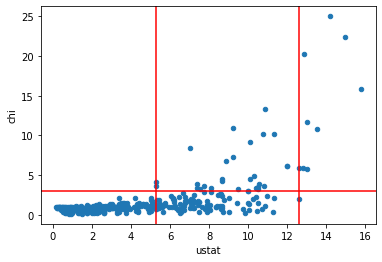

In [38]:
df.plot.scatter(x='ustat', y='chi')
plt.axhline(y=3, color='red', linestyle='-')
plt.axvline(x=5.26, color='red', linestyle='-')
plt.axvline(x=12.60, color='red', linestyle='-')

We want to isolate the region between ustat = 5.26 and ustat = 12.60.

In [39]:
df = df.loc[df['ustat'] >= 5.26]
df = df.loc[df['ustat'] < 12.60]

In [40]:
df = df.reset_index(drop=True)
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,10.833991,2.276779,2.276779,60.0,1.168432
3,8.667192,2.276779,2.276779,60.0,0.882475
4,7.222660,2.276779,2.276779,60.0,0.837454


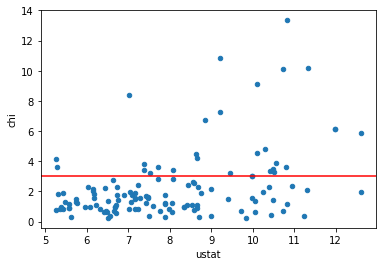

In [41]:
df.plot.scatter(x='ustat', y='chi')
plt.axhline(y=3, color='red', linestyle='-')

In [42]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(df['alph1'])):
    diff.append(abs(df['alph1'][i] - df['alph2'][i]))
    
df['diff'] = diff

In [43]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels

In [44]:
# df.to_csv("../../data/processed/week03_overlap_data.csv", index = False)